<a href="https://colab.research.google.com/github/jsgaston/machinelearning-az/blob/master/RMSE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# description: this program uses an artificial recurrent neural network called Long Short Term Memory (LSTM)
# to predict the colosing stock price of a corporation (Apple Inc.) using the past 60 day stock price.

In [ ]:
#importe the libreries
import math
import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

/usr/local/lib/python3.6/dist-packages/pandas_datareader/compat/__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal


In [ ]:
#get the stock quote
df = web.DataReader('AAPL', data_source='yahoo', start='2012-01-01', end='2020-08-20')
#show de data
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-01-03,58.928570,58.428570,58.485714,58.747143,75555200.0,50.765709
2012-01-04,59.240002,58.468571,58.571430,59.062859,65005500.0,51.038536
2012-01-05,59.792858,58.952858,59.278572,59.718571,67817400.0,51.605175
2012-01-06,60.392857,59.888573,59.967144,60.342857,79573200.0,52.144630
2012-01-09,61.107143,60.192856,60.785713,60.247143,98506100.0,52.061932
...,...,...,...,...,...,...
2020-08-14,460.000000,452.179993,459.320007,459.630005,41391300.0,459.630005
2020-08-17,464.350006,455.850006,464.250000,458.429993,29890400.0,458.429993
2020-08-18,464.000000,456.029999,457.410004,462.250000,26408400.0,462.250000


In [ ]:
#get the number of rows and columns in the data set
df.shape

(2173, 6)

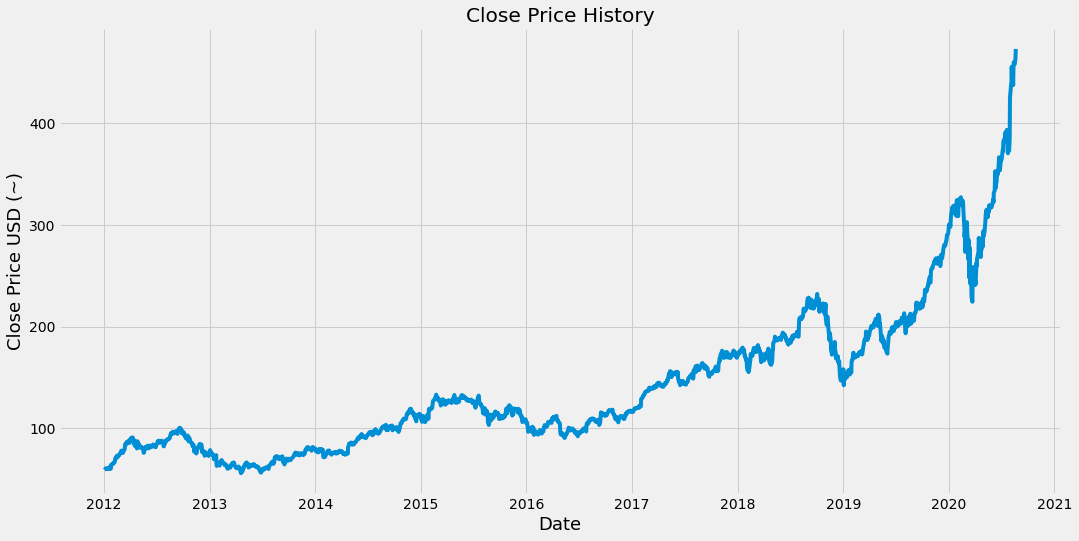

In [ ]:
#visualize the closing price history
plt.figure(figsize=(16,8))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD (~)',fontsize=18)
plt.show()

In [ ]:
#create a new dataframe with only the 'close colum
data = df.filter(['Close'])
#convert the dataframe to a numpy array
dataset = data.values
#get the numer of rows to trein the model on
training_data_len = math.ceil( len(dataset)* .8)
training_data_len

1739

In [ ]:
#scale the data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)
scaled_data

array([[0.0070862 ],
       [0.00784275],
       [0.00941403],
       ...,
       [0.97400013],
       [0.97538995],
       [1.        ]])

In [ ]:
#create the training data set
#create the scaled training data set
train_data = scaled_data[0:training_data_len , :]
#split the data into x_train and y_train data sets
x_train = []
y_train = []
for i in range(60, len(train_data)):
  x_train.append(train_data[i-60:i, 0])
  y_train.append(train_data[i, 0])
  if i<= 60:
    print(x_train)
    print(y_train)
    print()

[array([0.0070862 , 0.00784275, 0.00941403, 0.01091001, 0.01068065,
       0.01119756, 0.01096136, 0.01056426, 0.01002338, 0.01169737,
       0.01320704, 0.01274147, 0.01019112, 0.01262507, 0.01022877,
       0.0192149 , 0.01851997, 0.01942715, 0.02138869, 0.02257656,
       0.02247729, 0.022111  , 0.02367202, 0.0251406 , 0.02680433,
       0.02949161, 0.03513661, 0.03522219, 0.03836477, 0.04071313,
       0.03667707, 0.03823125, 0.03820045, 0.04255829, 0.04193867,
       0.04308547, 0.04514628, 0.0462931 , 0.04959657, 0.05200314,
       0.05269805, 0.05294112, 0.04882633, 0.04783357, 0.04798078,
       0.05184908, 0.0529377 , 0.05527579, 0.06078728, 0.06814051,
       0.06676434, 0.06676776, 0.07208413, 0.07374784, 0.07256338,
       0.07148164, 0.07035537, 0.07409701, 0.07666449, 0.0777394 ])]
[0.07508292357019972]



In [ ]:
#convert the x_train and u_train to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)

In [ ]:
#reshape the data
x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1], 1))
x_train.shape

(1679, 60, 1)

In [ ]:
#build the lstm model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape = (x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))


In [ ]:
#compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

In [ ]:
#train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)

1679/1679 [==============================] - 36s 22ms/step - loss: 3.2604e-04


In [ ]:
#create the testing data set
#create a new array containing scaled values from index 1679(x_train.shape) to 2173==(numero de rows)
test_data = scaled_data[training_data_len - 60: , :]
#create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
  x_test.append(test_data[i-60:i, 0])

In [ ]:
#convert the data to a numpy array
x_test = np.array(x_test)

In [ ]:
#reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [ ]:
#get the models predicted price values
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

In [ ]:
#get the root mean squared error (RMSE)
rmse=np.sqrt(np.mean(((predictions- y_test)**2)))
rmse

11.270435843278785

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


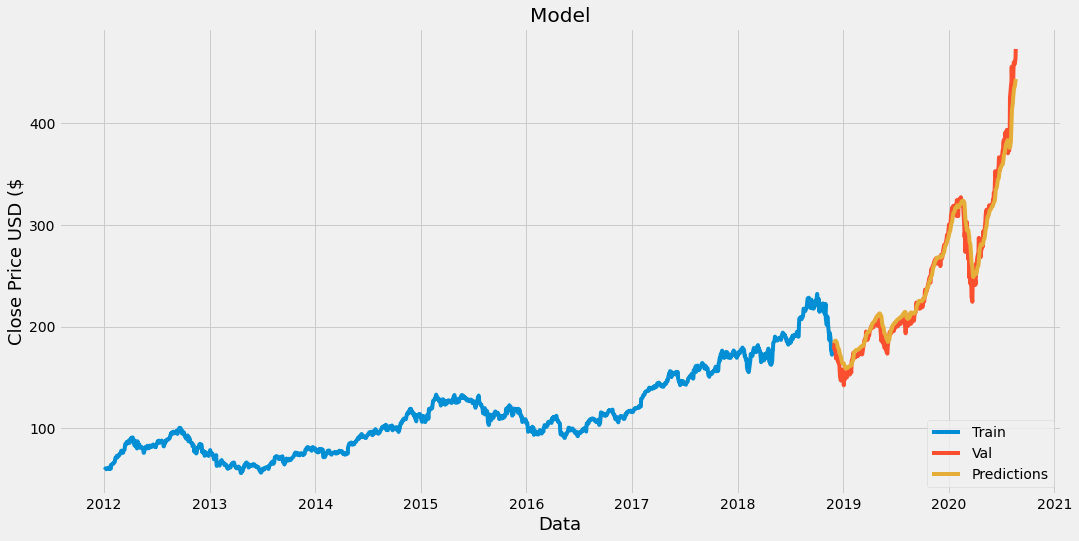

In [ ]:
#plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
#visualize the data
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Data', fontsize=18)
plt.ylabel('Close Price USD ($', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train','Val','Predictions'], loc="lower right")
plt.show()

In [ ]:
#show the valid and predicted prices
valid

,Close,Predictions
Date,,
2018-11-29,179.550003,186.142807
2018-11-30,178.580002,185.700180
2018-12-03,184.820007,185.470581
2018-12-04,176.690002,186.029602
2018-12-06,174.720001,186.035416
...,...,...
2020-08-14,459.630005,433.851318
2020-08-17,458.429993,436.864838
2020-08-18,462.250000,439.290070


In [ ]:
#get the quote
apple_quote = web.DataReader('AAPL', data_source='yahoo', start='2012-01-01', end='2020-08-20')
#create a new data frame
new_df = apple_quote.filter(['Close'])
#get the last 60 day closing price values and convert  the dataframe to an array
last_60_days = new_df[-60:].values
#Scale the data to be values between 0 and 1
last_60_days_scaled = scaler.transform(last_60_days)
#create an empy list
X_test = []
#Append the past 60 days
X_test.append(last_60_days_scaled)
#convert the X_test data to a numpy array
X_test = np.array(X_test)
#Reshape the data
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
#get the predicted scaled price
pred_price = model.predict(X_test)
#undo the scaling
pred_price = scaler.inverse_transform(pred_price)
print(pred_price)

[[446.28253]]


In [ ]:
#get the quote
apple_quote2 = web.DataReader('AAPL', data_source='yahoo', start='2020-08-20', end='2020-08-20')
print(apple_quote2['Close'])

Date
2020-08-20    473.100006
Name: Close, dtype: float64
